In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

# MITBIH Dataset

In [2]:
train_df_mitbih = pd.read_csv('mitbih_train.csv', header=None)
train_df_mitbih

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87549,0.807018,0.494737,0.536842,0.529825,0.491228,0.484211,0.456140,0.396491,0.284211,0.136842,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87550,0.718333,0.605000,0.486667,0.361667,0.231667,0.120000,0.051667,0.001667,0.000000,0.013333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87551,0.906122,0.624490,0.595918,0.575510,0.530612,0.481633,0.444898,0.387755,0.322449,0.191837,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87552,0.858228,0.645570,0.845570,0.248101,0.167089,0.131646,0.121519,0.121519,0.118987,0.103797,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


In [3]:
equilibre=train_df_mitbih[187].value_counts()
equilibre

187
0.0    72471
4.0     6431
2.0     5788
1.0     2223
3.0      641
Name: count, dtype: int64

<Axes: title={'center': 'Frequency of each class in the dataset'}, xlabel='Classes', ylabel='Frequency'>

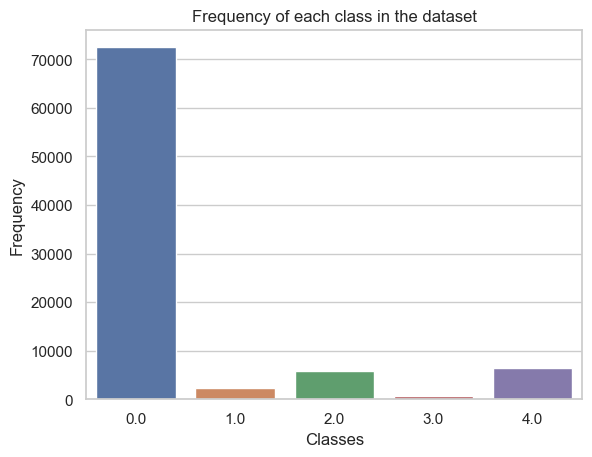

In [4]:
# Plot the frequency of each class
sns.set(style="whitegrid")
ax = sns.barplot(x=equilibre.index, y=equilibre)
ax.set(xlabel='Classes', ylabel='Frequency')
ax.set_title('Frequency of each class in the dataset')
ax

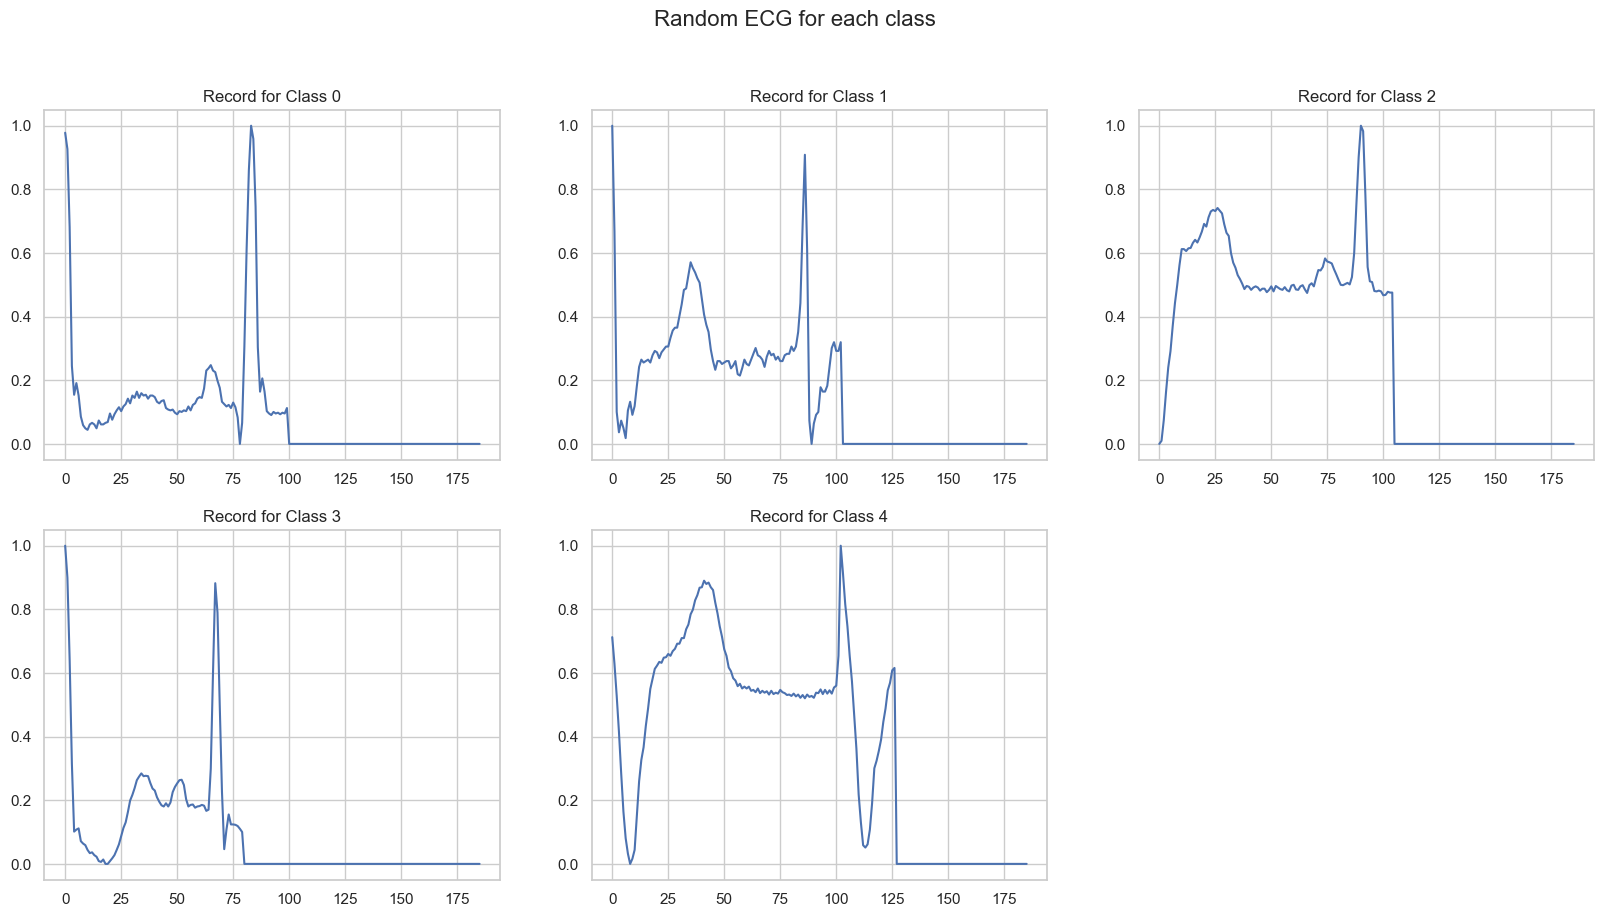

In [5]:
# Plot a random sample of each class
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
for i in range(5):
    plt.subplot(2,3,i+1)
    plt.plot(train_df_mitbih[train_df_mitbih[187]==i].iloc[0,:186])
    plt.title('Record for Class '+str(i))
# Big title for all
plt.suptitle('Random ECG for each class', size=16)
plt.show()

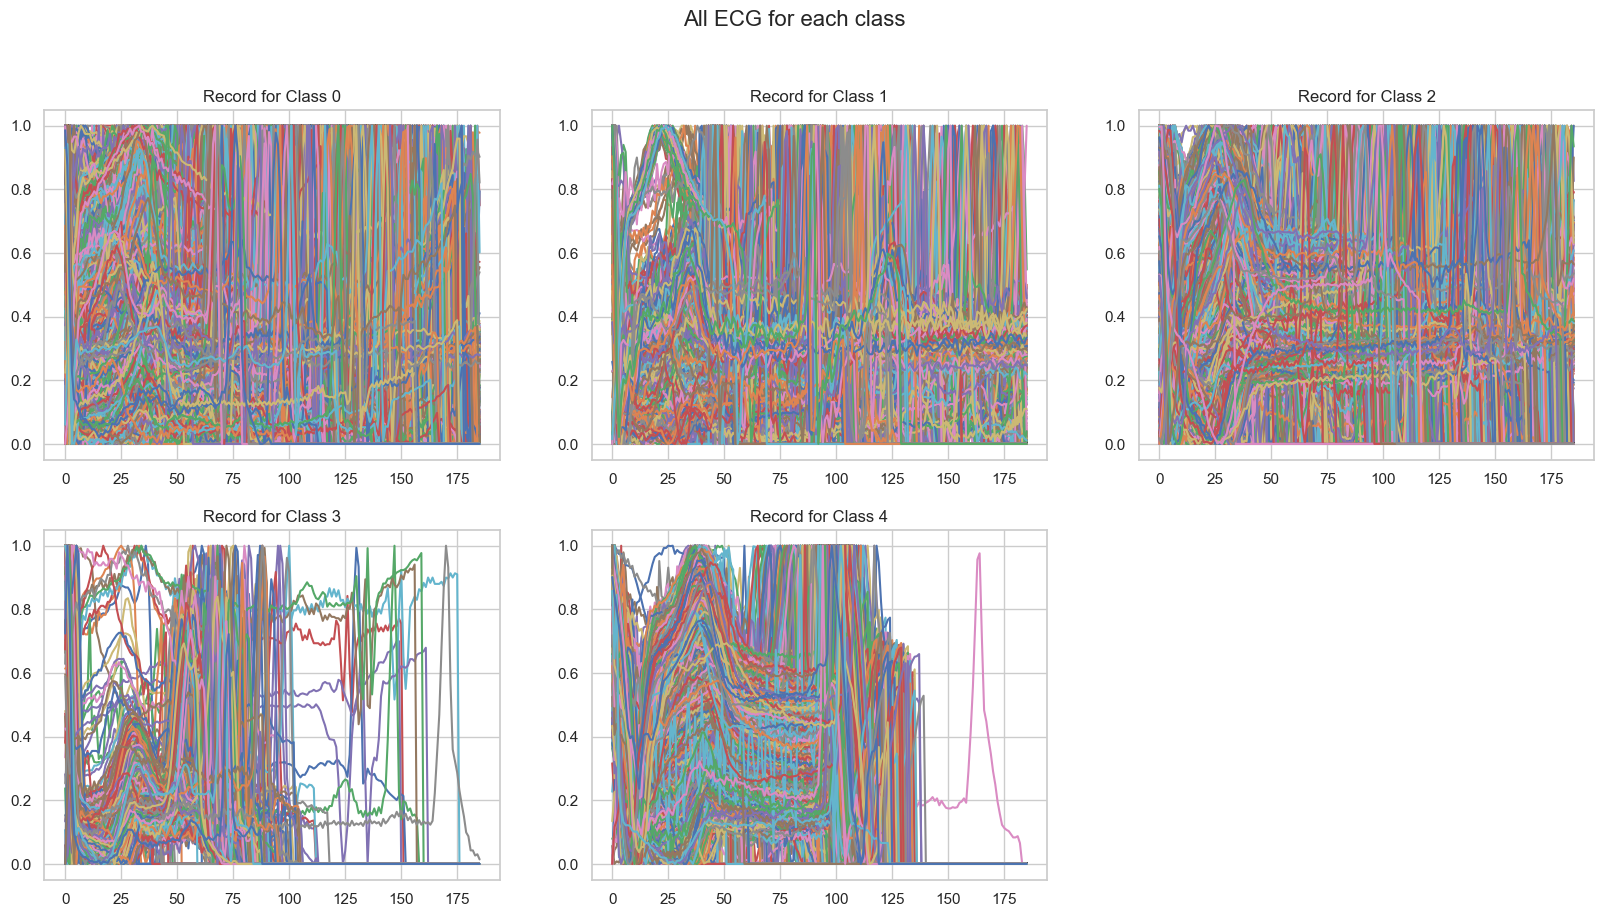

In [9]:
# Plot all data of each class
plt.figure(figsize=(20,10))
for i in range(5):
    plt.subplot(2,3,i+1)
    plt.plot(train_df_mitbih[train_df_mitbih[187]==i].iloc[:,0:186].T)
    plt.title('Record for Class '+str(i))
# Big title for all
plt.suptitle('All ECG for each class', size=16)
plt.show()

In [6]:
# Total number of rows
total_rows = train_df_mitbih.shape[0]
total_rows/5

17510.8

In [7]:
# Balance the dataset by sampling each class to have 17500 samples
df_n = train_df_mitbih[train_df_mitbih[187]==0].sample(n=17500, random_state=42)
# Upsample the other classes to have 17500 samples
df_q = train_df_mitbih[train_df_mitbih[187]==1].sample(n=17500, random_state=42, replace=True)
df_v = train_df_mitbih[train_df_mitbih[187]==2].sample(n=17500, random_state=42, replace=True)
df_s = train_df_mitbih[train_df_mitbih[187]==3].sample(n=17500, random_state=42, replace=True)
df_f = train_df_mitbih[train_df_mitbih[187]==4].sample(n=17500, random_state=42, replace=True)

In [8]:
# Train and test data after balancing
train_df_mitbih_balanced = pd.concat([df_n, df_q, df_v, df_s, df_f])
train_df_mitbih_balanced

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
10153,0.162791,0.540698,0.755814,0.186047,0.168605,0.546512,0.616279,0.697674,0.651163,0.703488,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33886,0.990066,0.938742,0.344371,0.034768,0.273179,0.331126,0.326159,0.341060,0.347682,0.347682,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32005,0.974239,0.932084,0.590164,0.131148,0.014052,0.168618,0.238876,0.210773,0.196721,0.208431,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
56159,0.978495,0.723118,0.526882,0.298387,0.220430,0.158602,0.091398,0.091398,0.080645,0.083333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
61783,0.963351,0.709424,0.060209,0.013089,0.057592,0.041885,0.047120,0.034031,0.039267,0.044503,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81992,0.758721,0.699128,0.642442,0.549419,0.441860,0.286337,0.175872,0.082849,0.024709,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
84644,0.766932,0.705179,0.663347,0.643426,0.595618,0.531873,0.486056,0.424303,0.374502,0.292829,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
85437,0.532258,0.392473,0.346774,0.336022,0.322581,0.311828,0.293011,0.260753,0.233871,0.150538,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
84994,1.000000,0.794931,0.442396,0.442396,0.000000,0.110599,0.172811,0.145161,0.202765,0.188940,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


<Axes: title={'center': 'Frequency of each class in the dataset after balancing'}, xlabel='Classes', ylabel='Frequency'>

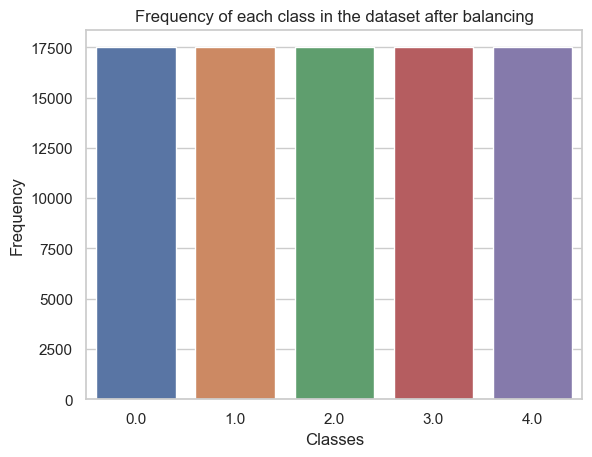

In [9]:
# Plot the frequency of each class after balancing
equilibre=train_df_mitbih_balanced[187].value_counts()
sns.set(style="whitegrid")
ax = sns.barplot(x=equilibre.index, y=equilibre)
ax.set(xlabel='Classes', ylabel='Frequency')
ax.set_title('Frequency of each class in the dataset after balancing')
ax


In [10]:
# Divide Valid and test data from the 'mitbih_test.csv' file (balanced)
test_df_mitbih = pd.read_csv('mitbih_test.csv', header=None)
valid_df_mitbih = test_df_mitbih.sample(frac=0.5, random_state=42)
test_df_mitbih = test_df_mitbih.drop(valid_df_mitbih.index)
test_df_mitbih

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.909408,0.975610,0.533101,0.134146,0.066202,0.000000,0.010453,0.012195,0.031359,0.146341,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1.000000,0.914230,0.473684,0.000000,0.064327,0.317739,0.405458,0.391813,0.382066,0.401559,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21883,1.000000,0.463519,0.480687,0.506438,0.575107,0.592275,0.643777,0.660944,0.648069,0.519313,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
21884,0.992958,0.542253,0.542253,0.552817,0.549296,0.524648,0.528169,0.461268,0.320423,0.207746,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
21885,1.000000,0.930337,0.858427,0.774157,0.658427,0.524719,0.400000,0.296629,0.203371,0.158427,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
21889,1.000000,0.967359,0.620178,0.347181,0.139466,0.089021,0.103858,0.100890,0.106825,0.100890,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


In [8]:
# Count the number of each class in valid and test data
print(valid_df_mitbih[187].value_counts())
print(test_df_mitbih[187].value_counts())


187
0.0    9106
4.0     795
2.0     694
1.0     267
3.0      84
Name: count, dtype: int64
187
0.0    9012
4.0     813
2.0     754
1.0     289
3.0      78
Name: count, dtype: int64


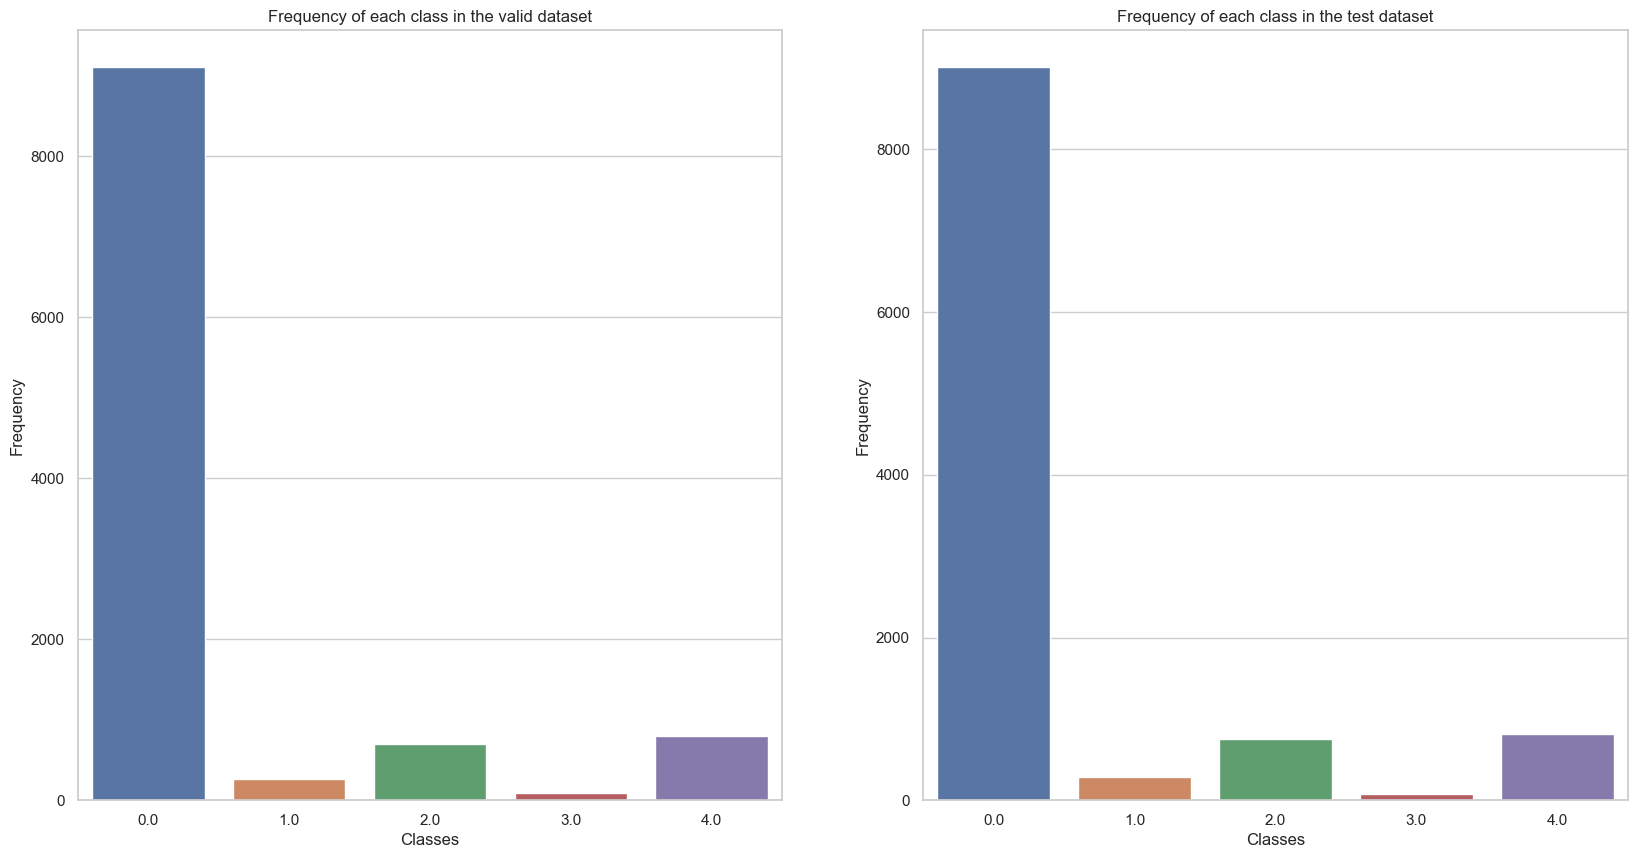

In [29]:
# Plot frequency of each class in valid and test data in 2 subplots
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.set(style="whitegrid")
ax = sns.barplot(x=valid_df_mitbih[187].value_counts().index, y=valid_df_mitbih[187].value_counts())
ax.set(xlabel='Classes', ylabel='Frequency')
ax.set_title('Frequency of each class in the valid dataset')
plt.subplot(1,2,2)
sns.set(style="whitegrid")
ax = sns.barplot(x=test_df_mitbih[187].value_counts().index, y=test_df_mitbih[187].value_counts())
ax.set(xlabel='Classes', ylabel='Frequency')
ax.set_title('Frequency of each class in the test dataset')
plt.show()

### Random Forest Model

In [16]:
# Create a classificaiton model using the balanced dataset
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

X_train = train_df_mitbih_balanced.iloc[:, :-1].values
y_train = train_df_mitbih_balanced.iloc[:, -1].values
X_test = test_df_mitbih.iloc[:, :-1].values
y_test = test_df_mitbih.iloc[:, -1].values

# Train the model
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

Classification Report: 
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      9012
         1.0       0.81      0.74      0.77       289
         2.0       0.95      0.94      0.94       754
         3.0       0.81      0.81      0.81        78
         4.0       0.99      0.97      0.98       813

    accuracy                           0.98     10946
   macro avg       0.91      0.89      0.90     10946
weighted avg       0.98      0.98      0.98     10946

Accuracy Score:  0.9767038187465741


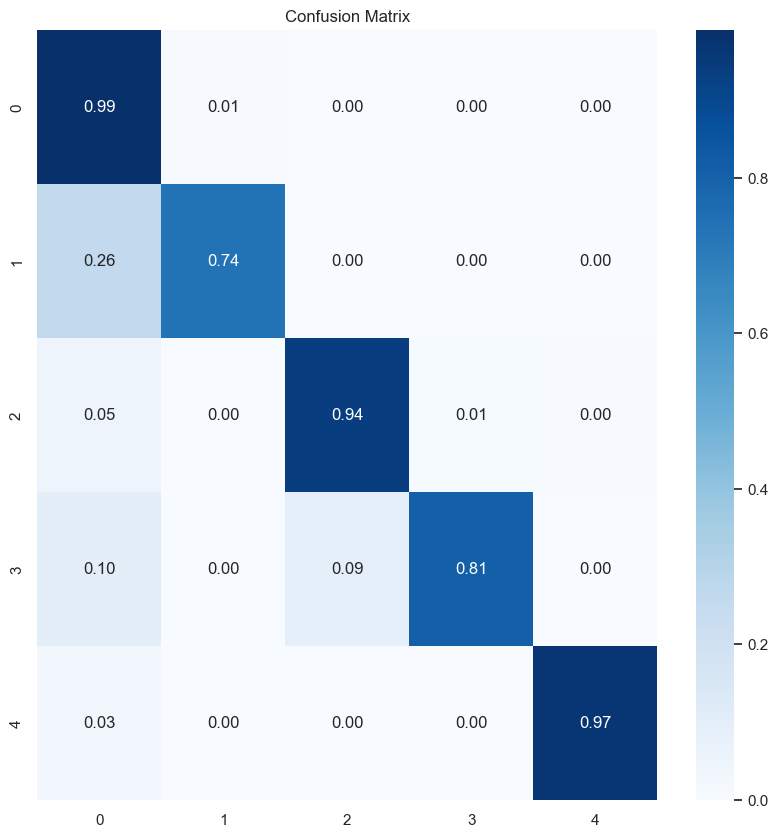

In [17]:
# Predict the test set
y_pred = classifier.predict(X_test)

# Evaluate the model
print("Classification Report: ")
print(classification_report(y_test, y_pred))
print("Accuracy Score: ", accuracy_score(y_test, y_pred))
# Plot the confusion matrix by normalizing the values
cm = confusion_matrix(y_test, y_pred)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt=".2f", cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

### Convolutional Neural Network for Classification

In [10]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchsummary import summary


# Create a deep convolutional neural network model with residual connections
# Input: 187 features
# Output: 5 classes
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv1d(1, 32, 5)
        self.conv2 = nn.Conv1d(32, 64, 5)
        self.conv3 = nn.Conv1d(64, 128, 5)
        self.pool = nn.MaxPool1d(2)
        self.fc1 = nn.Linear(128*19, 512)
        self.fc2 = nn.Linear(512, 128)
        self.fc3 = nn.Linear(128, 5)


    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = nn.Flatten()(x)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Summary of the model
model = Net()
summary(model, (1, 187))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv1d-1              [-1, 32, 183]             192
         MaxPool1d-2               [-1, 32, 91]               0
            Conv1d-3               [-1, 64, 87]          10,304
         MaxPool1d-4               [-1, 64, 43]               0
            Conv1d-5              [-1, 128, 39]          41,088
         MaxPool1d-6              [-1, 128, 19]               0
            Linear-7                  [-1, 512]       1,245,696
            Linear-8                  [-1, 128]          65,664
            Linear-9                    [-1, 5]             645
Total params: 1,363,589
Trainable params: 1,363,589
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.19
Params size (MB): 5.20
Estimated Total Size (MB): 5.39
---------------------------------------

In [11]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchsummary import summary

# Convert the dataset to PyTorch tensors
class ECGDataset(torch.utils.data.Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32).unsqueeze(1)
        self.y = torch.tensor(y, dtype=torch.long)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

In [12]:
X_train = train_df_mitbih_balanced.iloc[:, :-1].values
y_train = train_df_mitbih_balanced.iloc[:, -1].values
X_valid = valid_df_mitbih.iloc[:, :-1].values
y_valid = valid_df_mitbih.iloc[:, -1].values
X_test = test_df_mitbih.iloc[:, :-1].values
y_test = test_df_mitbih.iloc[:, -1].values

train_dataset = ECGDataset(X_train, y_train)
valid_dataset = ECGDataset(X_valid, y_valid)
test_dataset = ECGDataset(X_test, y_test)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
valid_loader = torch.utils.data.DataLoader(valid_dataset, batch_size=64, shuffle=False)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

In [21]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = Net().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [23]:
from tqdm.auto import tqdm

# Train the model with validation
n_epochs = 20
train_losses = []
train_accuracies = []
valid_losses = []
valid_accuracies = []
for epoch in range(n_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for i, (inputs, labels) in enumerate(tqdm(train_loader, desc=f'Epoch {epoch+1}/{n_epochs}', leave=False)):
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)
    train_losses.append(running_loss/len(train_loader))
    train_accuracies.append(correct/total)

    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for i, (inputs, labels) in enumerate(valid_loader):
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)
    valid_losses.append(running_loss/len(valid_loader))
    valid_accuracies.append(correct/total)

    print(f'Epoch {epoch+1}/{n_epochs}, Train Loss: {train_losses[-1]:.4f}, Train Accuracy: {train_accuracies[-1]:.4f}, Valid Loss: {valid_losses[-1]:.4f}, Valid Accuracy: {valid_accuracies[-1]:.4f}')

Epoch 1/20:   0%|          | 0/1368 [00:00<?, ?it/s]

Epoch 1/20, Train Loss: 0.1037, Train Accuracy: 0.9644, Valid Loss: 0.1688, Valid Accuracy: 0.9423


Epoch 2/20:   0%|          | 0/1368 [00:00<?, ?it/s]

Epoch 2/20, Train Loss: 0.0646, Train Accuracy: 0.9778, Valid Loss: 0.1659, Valid Accuracy: 0.9528


Epoch 3/20:   0%|          | 0/1368 [00:00<?, ?it/s]

Epoch 3/20, Train Loss: 0.0451, Train Accuracy: 0.9852, Valid Loss: 0.1577, Valid Accuracy: 0.9553


Epoch 4/20:   0%|          | 0/1368 [00:00<?, ?it/s]

Epoch 4/20, Train Loss: 0.0338, Train Accuracy: 0.9892, Valid Loss: 0.1675, Valid Accuracy: 0.9558


Epoch 5/20:   0%|          | 0/1368 [00:00<?, ?it/s]

Epoch 5/20, Train Loss: 0.0299, Train Accuracy: 0.9906, Valid Loss: 0.1631, Valid Accuracy: 0.9646


Epoch 6/20:   0%|          | 0/1368 [00:00<?, ?it/s]

Epoch 6/20, Train Loss: 0.0259, Train Accuracy: 0.9919, Valid Loss: 0.1362, Valid Accuracy: 0.9674


Epoch 7/20:   0%|          | 0/1368 [00:00<?, ?it/s]

Epoch 7/20, Train Loss: 0.0210, Train Accuracy: 0.9931, Valid Loss: 0.1575, Valid Accuracy: 0.9643


Epoch 8/20:   0%|          | 0/1368 [00:00<?, ?it/s]

Epoch 8/20, Train Loss: 0.0184, Train Accuracy: 0.9942, Valid Loss: 0.1308, Valid Accuracy: 0.9742


Epoch 9/20:   0%|          | 0/1368 [00:00<?, ?it/s]

Epoch 9/20, Train Loss: 0.0157, Train Accuracy: 0.9952, Valid Loss: 0.1826, Valid Accuracy: 0.9633


Epoch 10/20:   0%|          | 0/1368 [00:00<?, ?it/s]

Epoch 10/20, Train Loss: 0.0156, Train Accuracy: 0.9949, Valid Loss: 0.1677, Valid Accuracy: 0.9656


Epoch 11/20:   0%|          | 0/1368 [00:00<?, ?it/s]

Epoch 11/20, Train Loss: 0.0136, Train Accuracy: 0.9960, Valid Loss: 0.1546, Valid Accuracy: 0.9715


Epoch 12/20:   0%|          | 0/1368 [00:00<?, ?it/s]

Epoch 12/20, Train Loss: 0.0120, Train Accuracy: 0.9965, Valid Loss: 0.1584, Valid Accuracy: 0.9722


Epoch 13/20:   0%|          | 0/1368 [00:00<?, ?it/s]

Epoch 13/20, Train Loss: 0.0116, Train Accuracy: 0.9968, Valid Loss: 0.1888, Valid Accuracy: 0.9679


Epoch 14/20:   0%|          | 0/1368 [00:00<?, ?it/s]

Epoch 14/20, Train Loss: 0.0120, Train Accuracy: 0.9964, Valid Loss: 0.1723, Valid Accuracy: 0.9708


Epoch 15/20:   0%|          | 0/1368 [00:00<?, ?it/s]

Epoch 15/20, Train Loss: 0.0099, Train Accuracy: 0.9971, Valid Loss: 0.1745, Valid Accuracy: 0.9707


Epoch 16/20:   0%|          | 0/1368 [00:00<?, ?it/s]

Epoch 16/20, Train Loss: 0.0089, Train Accuracy: 0.9973, Valid Loss: 0.1926, Valid Accuracy: 0.9661


Epoch 17/20:   0%|          | 0/1368 [00:00<?, ?it/s]

Epoch 17/20, Train Loss: 0.0083, Train Accuracy: 0.9977, Valid Loss: 0.1881, Valid Accuracy: 0.9730


Epoch 18/20:   0%|          | 0/1368 [00:00<?, ?it/s]

Epoch 18/20, Train Loss: 0.0091, Train Accuracy: 0.9972, Valid Loss: 0.1837, Valid Accuracy: 0.9709


Epoch 19/20:   0%|          | 0/1368 [00:00<?, ?it/s]

Epoch 19/20, Train Loss: 0.0059, Train Accuracy: 0.9982, Valid Loss: 0.1905, Valid Accuracy: 0.9760


Epoch 20/20:   0%|          | 0/1368 [00:00<?, ?it/s]

Epoch 20/20, Train Loss: 0.0085, Train Accuracy: 0.9974, Valid Loss: 0.2193, Valid Accuracy: 0.9687


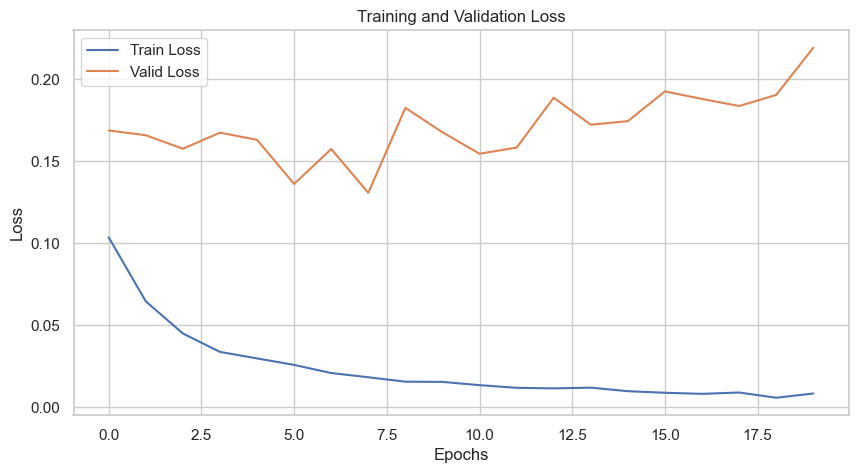

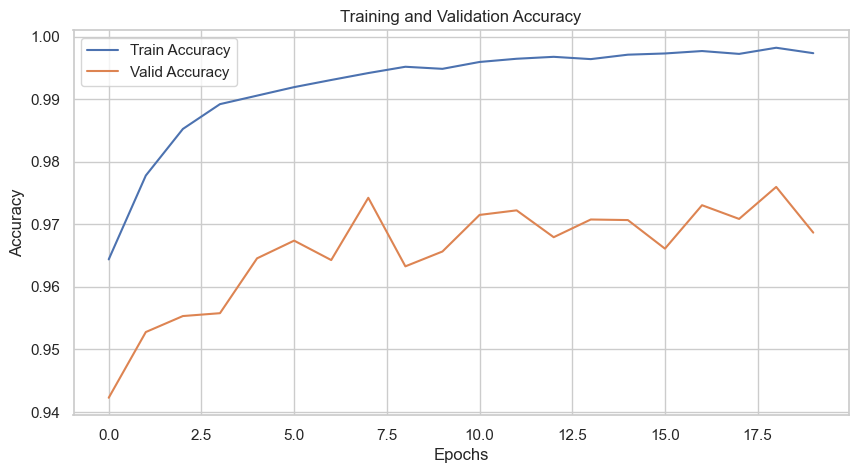

In [25]:
# Plot the training and validation loss
plt.figure(figsize=(10,5))
plt.plot(train_losses, label='Train Loss')
plt.plot(valid_losses, label='Valid Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plot the training and validation accuracy
plt.figure(figsize=(10,5))
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(valid_accuracies, label='Valid Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      9012
           1       0.67      0.87      0.76       289
           2       0.94      0.94      0.94       754
           3       0.61      0.92      0.73        78
           4       0.97      0.99      0.98       813

    accuracy                           0.97     10946
   macro avg       0.84      0.94      0.88     10946
weighted avg       0.98      0.97      0.97     10946

Accuracy Score: 0.972592727937146


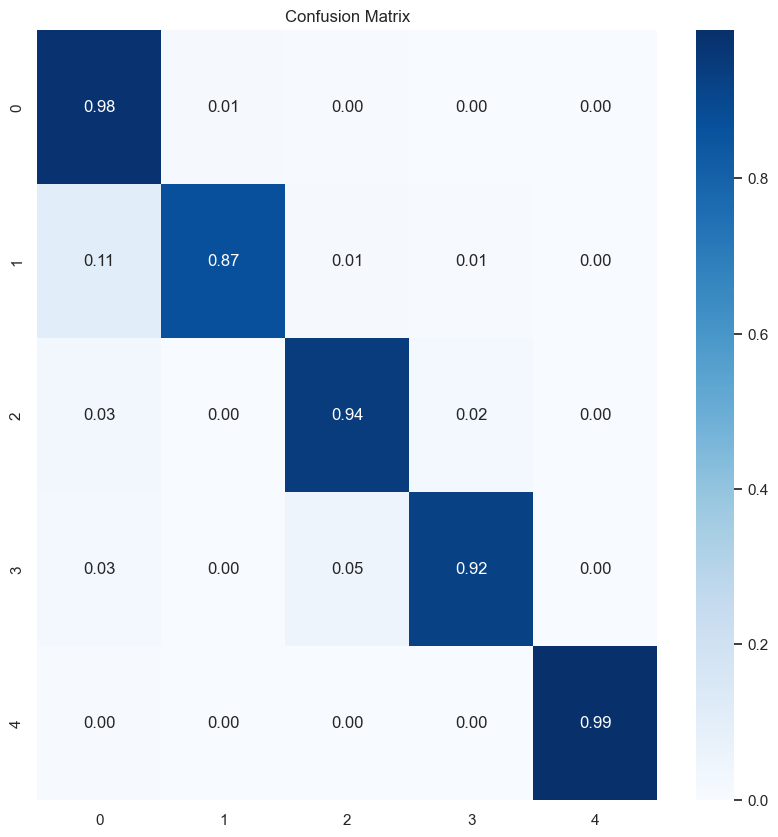

In [26]:
# Test the model in the test dataset
model.eval()
test_acc = 0

# Classification report
y_pred = []
y_true = []
for X, y in test_loader:
    X, y = X.to(device), y.to(device)
    output = model(X)
    y_pred.extend(output.argmax(1).tolist())
    y_true.extend(y.tolist())
    test_acc += (output.argmax(1) == y).sum().item()
print(classification_report(y_true, y_pred))
print(f"Accuracy Score: {test_acc/len(test_dataset)}")


# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt=".2f", cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

### RNN(LSTM) for classification

In [85]:
# RNN model with batch normalization and dropout
class RNN(nn.Module):
    def __init__(self):
        super(RNN, self).__init__()
        self.rnn = nn.RNN(187, 1024, 3, batch_first=True, nonlinearity='relu')
        self.fc1 = nn.Linear(1024, 512)
        self.fc2 = nn.Linear(512, 128)
        self.fc3 = nn.Linear(128, 5)
        self.bn1 = nn.BatchNorm1d(512)
        self.bn2 = nn.BatchNorm1d(128)
        
        

    def forward(self, x):
        h0 = torch.zeros(3, x.size(0), 1024).to(device)
        out, _ = self.rnn(x, h0)
        out = out[:, -1, :]
        out = F.relu(self.fc1(out))
        out = self.bn1(out)
        out = F.relu(self.fc2(out))
        out = self.bn2(out)
        out = self.fc3(out)
        return out

# Summary of the model
model = RNN()
summary(model, (1, 187))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
               RNN-1  [[-1, 1, 1024], [-1, 2, 1024]]               0
            Linear-2                  [-1, 512]         524,800
       BatchNorm1d-3                  [-1, 512]           1,024
            Linear-4                  [-1, 128]          65,664
       BatchNorm1d-5                  [-1, 128]             256
            Linear-6                    [-1, 5]             645
Total params: 592,389
Trainable params: 592,389
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 15.99
Params size (MB): 2.26
Estimated Total Size (MB): 18.25
----------------------------------------------------------------


In [86]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = RNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [87]:
# Train the model with validation
n_epochs = 20
train_losses = []
train_accuracies = []
valid_losses = []
valid_accuracies = []

for epoch in range(n_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for i, (inputs, labels) in enumerate(tqdm(train_loader, desc=f'Epoch {epoch+1}/{n_epochs}', leave=False)):
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)
    train_losses.append(running_loss/len(train_loader))
    train_accuracies.append(correct/total)

    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for i, (inputs, labels) in enumerate(valid_loader):
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)
    valid_losses.append(running_loss/len(valid_loader))
    valid_accuracies.append(correct/total)

    print(f'Epoch {epoch+1}/{n_epochs}, Train Loss: {train_losses[-1]:.4f}, Train Accuracy: {train_accuracies[-1]:.4f}, Valid Loss: {valid_losses[-1]:.4f}, Valid Accuracy: {valid_accuracies[-1]:.4f}')

Epoch 1/20:   0%|          | 0/1368 [00:00<?, ?it/s]

Epoch 1/20, Train Loss: 0.3782, Train Accuracy: 0.8624, Valid Loss: 0.3525, Valid Accuracy: 0.8858


Epoch 2/20:   0%|          | 0/1368 [00:00<?, ?it/s]

Epoch 2/20, Train Loss: 0.2183, Train Accuracy: 0.9212, Valid Loss: 0.2912, Valid Accuracy: 0.8874


Epoch 3/20:   0%|          | 0/1368 [00:00<?, ?it/s]

Epoch 3/20, Train Loss: 0.1587, Train Accuracy: 0.9432, Valid Loss: 0.2550, Valid Accuracy: 0.9139


Epoch 4/20:   0%|          | 0/1368 [00:00<?, ?it/s]

Epoch 4/20, Train Loss: 0.1245, Train Accuracy: 0.9573, Valid Loss: 0.2865, Valid Accuracy: 0.8945


Epoch 5/20:   0%|          | 0/1368 [00:00<?, ?it/s]

Epoch 5/20, Train Loss: 0.1000, Train Accuracy: 0.9653, Valid Loss: 0.2904, Valid Accuracy: 0.8948


Epoch 6/20:   0%|          | 0/1368 [00:00<?, ?it/s]

Epoch 6/20, Train Loss: 0.0861, Train Accuracy: 0.9707, Valid Loss: 0.2754, Valid Accuracy: 0.9073


Epoch 7/20:   0%|          | 0/1368 [00:00<?, ?it/s]

Epoch 7/20, Train Loss: 0.0736, Train Accuracy: 0.9751, Valid Loss: 0.2698, Valid Accuracy: 0.9060


Epoch 8/20:   0%|          | 0/1368 [00:00<?, ?it/s]

Epoch 8/20, Train Loss: 0.0659, Train Accuracy: 0.9782, Valid Loss: 0.2216, Valid Accuracy: 0.9265


Epoch 9/20:   0%|          | 0/1368 [00:00<?, ?it/s]

Epoch 9/20, Train Loss: 0.0599, Train Accuracy: 0.9798, Valid Loss: 0.1751, Valid Accuracy: 0.9462


Epoch 10/20:   0%|          | 0/1368 [00:00<?, ?it/s]

Epoch 10/20, Train Loss: 0.0542, Train Accuracy: 0.9817, Valid Loss: 0.1768, Valid Accuracy: 0.9448


Epoch 11/20:   0%|          | 0/1368 [00:00<?, ?it/s]

Epoch 11/20, Train Loss: 0.0473, Train Accuracy: 0.9844, Valid Loss: 0.1741, Valid Accuracy: 0.9493


Epoch 12/20:   0%|          | 0/1368 [00:00<?, ?it/s]

Epoch 12/20, Train Loss: 0.0420, Train Accuracy: 0.9861, Valid Loss: 0.1656, Valid Accuracy: 0.9563


Epoch 13/20:   0%|          | 0/1368 [00:00<?, ?it/s]

Epoch 13/20, Train Loss: 0.0442, Train Accuracy: 0.9855, Valid Loss: 0.1857, Valid Accuracy: 0.9434


Epoch 14/20:   0%|          | 0/1368 [00:00<?, ?it/s]

Epoch 14/20, Train Loss: 0.0369, Train Accuracy: 0.9880, Valid Loss: 0.1373, Valid Accuracy: 0.9640


Epoch 15/20:   0%|          | 0/1368 [00:00<?, ?it/s]

Epoch 15/20, Train Loss: 0.0359, Train Accuracy: 0.9882, Valid Loss: 0.2118, Valid Accuracy: 0.9446


Epoch 16/20:   0%|          | 0/1368 [00:00<?, ?it/s]

Epoch 16/20, Train Loss: 0.0326, Train Accuracy: 0.9897, Valid Loss: 0.1583, Valid Accuracy: 0.9590


Epoch 17/20:   0%|          | 0/1368 [00:00<?, ?it/s]

Epoch 17/20, Train Loss: 0.0330, Train Accuracy: 0.9895, Valid Loss: 0.2378, Valid Accuracy: 0.9331


Epoch 18/20:   0%|          | 0/1368 [00:00<?, ?it/s]

Epoch 18/20, Train Loss: 0.0290, Train Accuracy: 0.9906, Valid Loss: 0.1437, Valid Accuracy: 0.9671


Epoch 19/20:   0%|          | 0/1368 [00:00<?, ?it/s]

Epoch 19/20, Train Loss: 0.0289, Train Accuracy: 0.9905, Valid Loss: 0.1951, Valid Accuracy: 0.9469


Epoch 20/20:   0%|          | 0/1368 [00:00<?, ?it/s]

Epoch 20/20, Train Loss: 0.0268, Train Accuracy: 0.9910, Valid Loss: 0.1533, Valid Accuracy: 0.9652


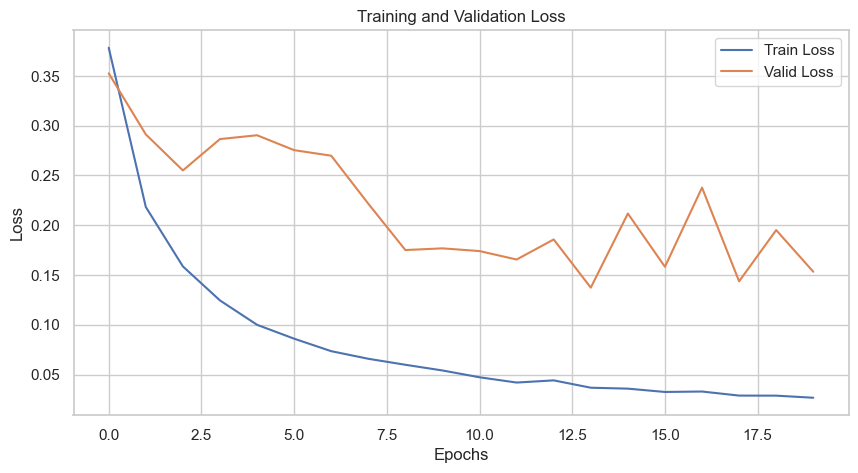

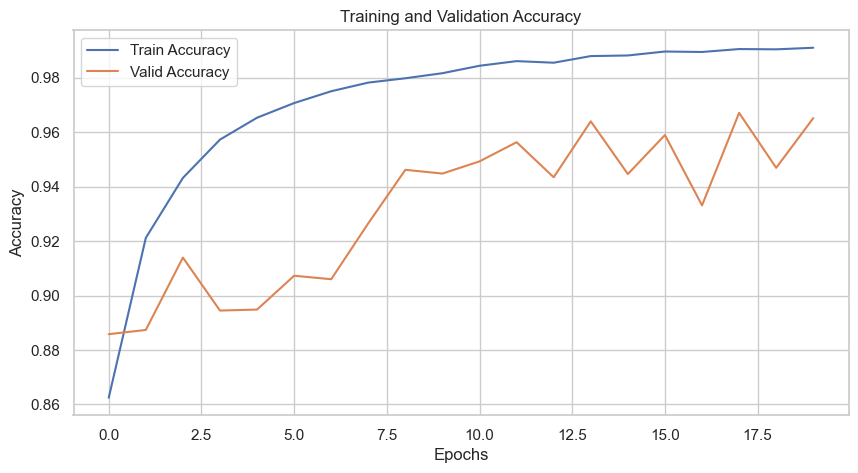

In [88]:
# Plot the training and validation loss
plt.figure(figsize=(10,5))
plt.plot(train_losses, label='Train Loss')
plt.plot(valid_losses, label='Valid Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Plot the training and validation accuracy
plt.figure(figsize=(10,5))
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(valid_accuracies, label='Valid Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      9012
           1       0.57      0.84      0.68       289
           2       0.92      0.95      0.94       754
           3       0.75      0.88      0.81        78
           4       0.96      0.99      0.98       813

    accuracy                           0.97     10946
   macro avg       0.84      0.93      0.88     10946
weighted avg       0.97      0.97      0.97     10946

Accuracy Score: 0.9662890553626896


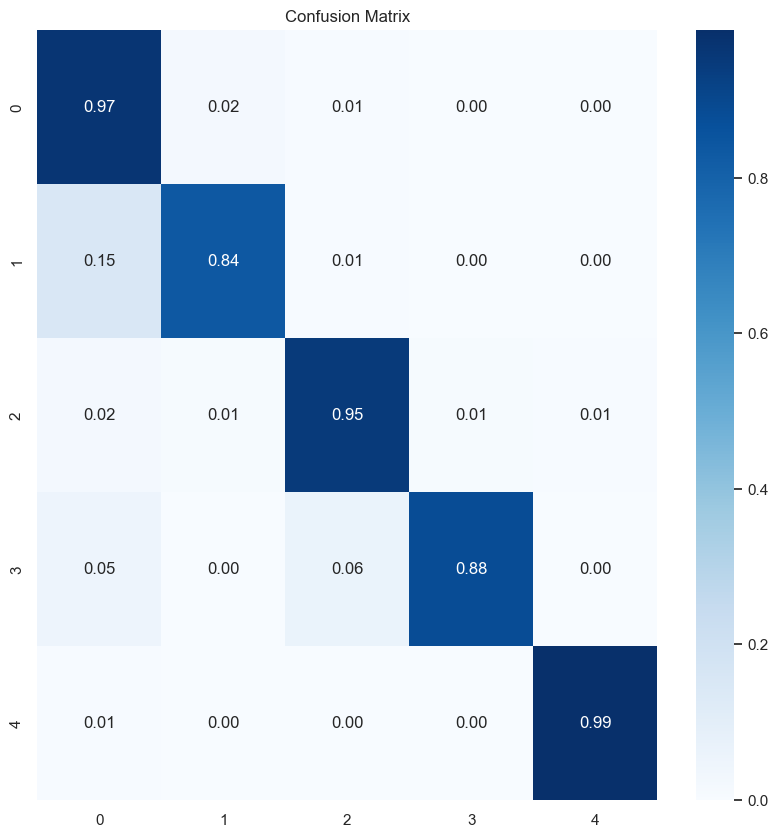

In [89]:
# Test the model in the test dataset
model.eval()
test_acc = 0

# Classification report
y_pred = []
y_true = []
for X, y in test_loader:
    X, y = X.to(device), y.to(device)
    output = model(X)
    y_pred.extend(output.argmax(1).tolist())
    y_true.extend(y.tolist())
    test_acc += (output.argmax(1) == y).sum().item()
print(classification_report(y_true, y_pred))
print(f"Accuracy Score: {test_acc/len(test_dataset)}")

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt=".2f", cmap='Blues')
plt.title('Confusion Matrix')
plt.show()



# CNN (with residual connection) for classification

In [33]:
# Build a CNN with 3 residual connections, batch normalization and dropout for ECG classification
# Input: (batch_size, 1, 187)
# Output: (batch_size, 5)
class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1):
        super(ResidualBlock, self).__init__()
        self.conv1 = nn.Conv1d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1)
        self.bn1 = nn.BatchNorm1d(out_channels)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = nn.Conv1d(out_channels, out_channels, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm1d(out_channels)
        self.dropout = nn.Dropout(p=0.5)

        if in_channels != out_channels:
            self.shortcut = nn.Sequential(
                nn.Conv1d(in_channels, out_channels, kernel_size=1, stride=stride),
                nn.BatchNorm1d(out_channels)
            )
        else:
            self.shortcut = nn.Sequential()

    def forward(self, x):
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        out = self.conv2(out)
        out = self.bn2(out)
        out = self.dropout(out)
        out += self.shortcut(x)
        out = self.relu(out)
        return out

class ECGNet(nn.Module):
    def __init__(self):
        super(ECGNet, self).__init__()
        # Create 5 residual blocks
        self.conv1 = nn.Conv1d(1, 64, kernel_size=7, stride=2, padding=3)
        self.bn1 = nn.BatchNorm1d(64)
        self.relu = nn.ReLU(inplace=True)
        self.pool = nn.MaxPool1d(kernel_size=3, stride=2, padding=1)
        self.block1 = ResidualBlock(64, 64)
        self.block2 = ResidualBlock(64, 128, stride=2)
        self.block3 = ResidualBlock(128, 128)
        self.block4 = ResidualBlock(128, 256, stride=2)
        self.block5 = ResidualBlock(256, 256)
        self.avgpool = nn.AdaptiveAvgPool1d(1)
        self.fc = nn.Linear(256, 5)

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.pool(x)
        x = self.block1(x)
        x = self.block2(x)
        x = self.block3(x)
        x = self.block4(x)
        x = self.block5(x)
        x = self.avgpool(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x

# Summary of the model
model = ECGNet()
summary(model, (1, 187))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv1d-1               [-1, 64, 94]             512
       BatchNorm1d-2               [-1, 64, 94]             128
              ReLU-3               [-1, 64, 94]               0
         MaxPool1d-4               [-1, 64, 47]               0
            Conv1d-5               [-1, 64, 47]          12,352
       BatchNorm1d-6               [-1, 64, 47]             128
              ReLU-7               [-1, 64, 47]               0
            Conv1d-8               [-1, 64, 47]          12,352
       BatchNorm1d-9               [-1, 64, 47]             128
          Dropout-10               [-1, 64, 47]               0
             ReLU-11               [-1, 64, 47]               0
    ResidualBlock-12               [-1, 64, 47]               0
           Conv1d-13              [-1, 128, 24]          24,704
      BatchNorm1d-14              [-1, 

In [38]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = ECGNet().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [39]:
from tqdm.auto import tqdm

# Train the model with validation
n_epochs = 20
train_losses = []
train_accuracies = []
valid_losses = []
valid_accuracies = []
for epoch in range(n_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for i, (inputs, labels) in enumerate(tqdm(train_loader, desc=f'Epoch {epoch+1}/{n_epochs}', leave=False)):
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)
    train_losses.append(running_loss/len(train_loader))
    train_accuracies.append(correct/total)

    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for i, (inputs, labels) in enumerate(valid_loader):
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)
    valid_losses.append(running_loss/len(valid_loader))
    valid_accuracies.append(correct/total)

    print(f'Epoch {epoch+1}/{n_epochs}, Train Loss: {train_losses[-1]:.4f}, Train Accuracy: {train_accuracies[-1]:.4f}, Valid Loss: {valid_losses[-1]:.4f}, Valid Accuracy: {valid_accuracies[-1]:.4f}')

Epoch 1/20:   0%|          | 0/1368 [00:00<?, ?it/s]

Epoch 1/20, Train Loss: 0.3604, Train Accuracy: 0.8694, Valid Loss: 0.4900, Valid Accuracy: 0.8011


Epoch 2/20:   0%|          | 0/1368 [00:00<?, ?it/s]

Epoch 2/20, Train Loss: 0.1848, Train Accuracy: 0.9330, Valid Loss: 0.2334, Valid Accuracy: 0.9114


Epoch 3/20:   0%|          | 0/1368 [00:00<?, ?it/s]

Epoch 3/20, Train Loss: 0.1268, Train Accuracy: 0.9555, Valid Loss: 0.1738, Valid Accuracy: 0.9431


Epoch 4/20:   0%|          | 0/1368 [00:00<?, ?it/s]

Epoch 4/20, Train Loss: 0.0975, Train Accuracy: 0.9656, Valid Loss: 0.1932, Valid Accuracy: 0.9382


Epoch 5/20:   0%|          | 0/1368 [00:00<?, ?it/s]

Epoch 5/20, Train Loss: 0.0831, Train Accuracy: 0.9718, Valid Loss: 0.1638, Valid Accuracy: 0.9504


Epoch 6/20:   0%|          | 0/1368 [00:00<?, ?it/s]

Epoch 6/20, Train Loss: 0.0712, Train Accuracy: 0.9756, Valid Loss: 0.1452, Valid Accuracy: 0.9564


Epoch 7/20:   0%|          | 0/1368 [00:00<?, ?it/s]

Epoch 7/20, Train Loss: 0.0623, Train Accuracy: 0.9791, Valid Loss: 0.1317, Valid Accuracy: 0.9621


Epoch 8/20:   0%|          | 0/1368 [00:00<?, ?it/s]

Epoch 8/20, Train Loss: 0.0548, Train Accuracy: 0.9812, Valid Loss: 0.1326, Valid Accuracy: 0.9629


Epoch 9/20:   0%|          | 0/1368 [00:00<?, ?it/s]

Epoch 9/20, Train Loss: 0.0471, Train Accuracy: 0.9841, Valid Loss: 0.1368, Valid Accuracy: 0.9620


Epoch 10/20:   0%|          | 0/1368 [00:00<?, ?it/s]

Epoch 10/20, Train Loss: 0.0439, Train Accuracy: 0.9850, Valid Loss: 0.1512, Valid Accuracy: 0.9590


Epoch 11/20:   0%|          | 0/1368 [00:00<?, ?it/s]

Epoch 11/20, Train Loss: 0.0382, Train Accuracy: 0.9873, Valid Loss: 0.1397, Valid Accuracy: 0.9648


Epoch 12/20:   0%|          | 0/1368 [00:00<?, ?it/s]

Epoch 12/20, Train Loss: 0.0350, Train Accuracy: 0.9886, Valid Loss: 0.1470, Valid Accuracy: 0.9635


Epoch 13/20:   0%|          | 0/1368 [00:00<?, ?it/s]

Epoch 13/20, Train Loss: 0.0343, Train Accuracy: 0.9884, Valid Loss: 0.1428, Valid Accuracy: 0.9656


Epoch 14/20:   0%|          | 0/1368 [00:00<?, ?it/s]

Epoch 14/20, Train Loss: 0.0332, Train Accuracy: 0.9889, Valid Loss: 0.1376, Valid Accuracy: 0.9629


Epoch 15/20:   0%|          | 0/1368 [00:00<?, ?it/s]

Epoch 15/20, Train Loss: 0.0282, Train Accuracy: 0.9908, Valid Loss: 0.1425, Valid Accuracy: 0.9662


Epoch 16/20:   0%|          | 0/1368 [00:00<?, ?it/s]

Epoch 16/20, Train Loss: 0.0272, Train Accuracy: 0.9909, Valid Loss: 0.1267, Valid Accuracy: 0.9702


Epoch 17/20:   0%|          | 0/1368 [00:00<?, ?it/s]

Epoch 17/20, Train Loss: 0.0255, Train Accuracy: 0.9912, Valid Loss: 0.1231, Valid Accuracy: 0.9712


Epoch 18/20:   0%|          | 0/1368 [00:00<?, ?it/s]

Epoch 18/20, Train Loss: 0.0247, Train Accuracy: 0.9920, Valid Loss: 0.1476, Valid Accuracy: 0.9668


Epoch 19/20:   0%|          | 0/1368 [00:00<?, ?it/s]

Epoch 19/20, Train Loss: 0.0214, Train Accuracy: 0.9927, Valid Loss: 0.1237, Valid Accuracy: 0.9746


Epoch 20/20:   0%|          | 0/1368 [00:00<?, ?it/s]

Epoch 20/20, Train Loss: 0.0210, Train Accuracy: 0.9930, Valid Loss: 0.1434, Valid Accuracy: 0.9686


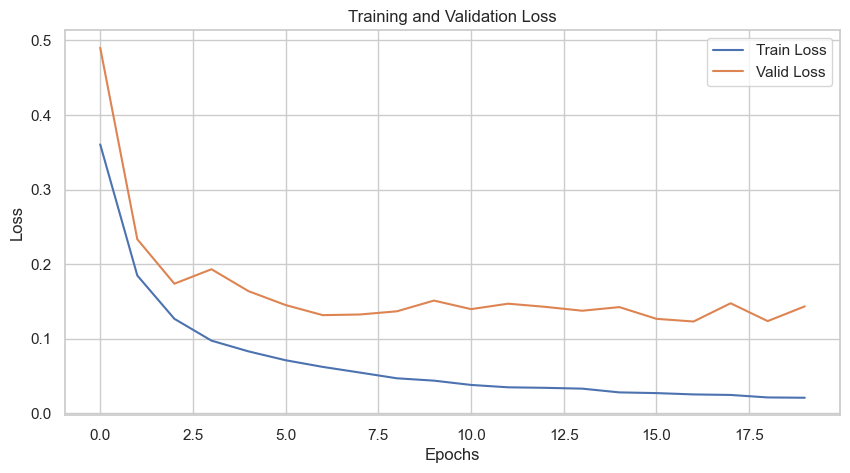

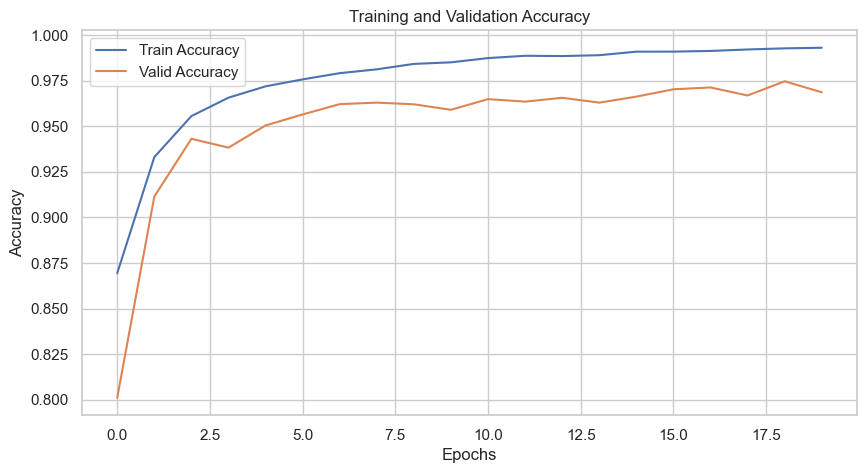

In [40]:
# Plot the training and validation loss
plt.figure(figsize=(10,5))
plt.plot(train_losses, label='Train Loss')
plt.plot(valid_losses, label='Valid Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Plot the training and validation accuracy
plt.figure(figsize=(10,5))
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(valid_accuracies, label='Valid Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

              precision    recall  f1-score   support

           0       1.00      0.97      0.99      9012
           1       0.64      0.93      0.75       289
           2       0.95      0.97      0.96       754
           3       0.54      0.94      0.69        78
           4       0.99      0.99      0.99       813

    accuracy                           0.97     10946
   macro avg       0.82      0.96      0.88     10946
weighted avg       0.98      0.97      0.98     10946

Accuracy Score: 0.9736890188196602


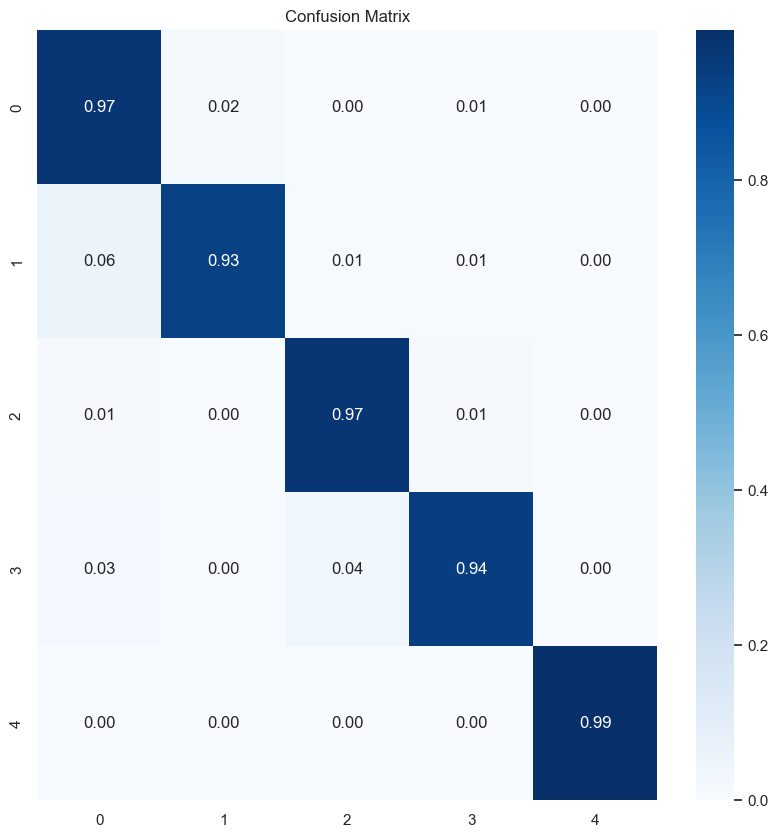

In [42]:
from sklearn.metrics import classification_report, confusion_matrix

# Test the model in the test dataset
model.eval()
test_acc = 0

# Classification report
y_pred = []
y_true = []
for X, y in test_loader:
    X, y = X.to(device), y.to(device)
    output = model(X)
    y_pred.extend(output.argmax(1).tolist())
    y_true.extend(y.tolist())
    test_acc += (output.argmax(1) == y).sum().item()
print(classification_report(y_true, y_pred))
print(f"Accuracy Score: {test_acc/len(test_dataset)}")

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt=".2f", cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

### RNN (Residual Connections) for classification

In [23]:
import torch
from torch import nn
from torchsummary import summary
import torch.nn.functional as F

class RNN_Residual(nn.Module):
    def __init__(self):
        super(RNN_Residual, self).__init__()
        self.rnn = nn.RNN(187, 1024, 3, batch_first=True, nonlinearity='relu')
        self.fc1 = nn.Linear(1024, 512)
        self.fc2 = nn.Linear(512, 128)
        self.fc3 = nn.Linear(128, 5)
        self.bn1 = nn.BatchNorm1d(512)
        self.bn2 = nn.BatchNorm1d(128)
        self.dropout = nn.Dropout(p=0.5)

    def forward(self, x):
        h0 = torch.zeros(3, x.size(0), 1024).to(device)
        out, _ = self.rnn(x, h0)
        out = out[:, -1, :]
        out = F.relu(self.fc1(out))
        out = self.bn1(out)
        out = F.relu(self.fc2(out))
        out = self.bn2(out)
        out = self.fc3(out)
        return out

In [25]:
model = RNN_Residual()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [26]:
from tqdm.auto import tqdm

# Train the model with validation
n_epochs = 20
train_losses = []
train_accuracies = []
valid_losses = []
valid_accuracies = []
for epoch in range(n_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for i, (inputs, labels) in enumerate(tqdm(train_loader, desc=f'Epoch {epoch+1}/{n_epochs}', leave=False)):
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)
    train_losses.append(running_loss/len(train_loader))
    train_accuracies.append(correct/total)

    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for i, (inputs, labels) in enumerate(valid_loader):
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)
    valid_losses.append(running_loss/len(valid_loader))
    valid_accuracies.append(correct/total)

    print(f'Epoch {epoch+1}/{n_epochs}, Train Loss: {train_losses[-1]:.4f}, Train Accuracy: {train_accuracies[-1]:.4f}, Valid Loss: {valid_losses[-1]:.4f}, Valid Accuracy: {valid_accuracies[-1]:.4f}')

Epoch 1/20:   0%|          | 0/1368 [00:00<?, ?it/s]

Epoch 1/20, Train Loss: 0.3753, Train Accuracy: 0.8630, Valid Loss: 0.2185, Valid Accuracy: 0.9294


Epoch 2/20:   0%|          | 0/1368 [00:00<?, ?it/s]

Epoch 2/20, Train Loss: 0.2117, Train Accuracy: 0.9236, Valid Loss: 0.2569, Valid Accuracy: 0.9030


Epoch 3/20:   0%|          | 0/1368 [00:00<?, ?it/s]

Epoch 3/20, Train Loss: 0.1571, Train Accuracy: 0.9443, Valid Loss: 0.2242, Valid Accuracy: 0.9184


Epoch 4/20:   0%|          | 0/1368 [00:00<?, ?it/s]

Epoch 4/20, Train Loss: 0.1232, Train Accuracy: 0.9568, Valid Loss: 0.2105, Valid Accuracy: 0.9268


Epoch 5/20:   0%|          | 0/1368 [00:00<?, ?it/s]

Epoch 5/20, Train Loss: 0.1018, Train Accuracy: 0.9644, Valid Loss: 0.2161, Valid Accuracy: 0.9227


Epoch 6/20:   0%|          | 0/1368 [00:00<?, ?it/s]

Epoch 6/20, Train Loss: 0.0853, Train Accuracy: 0.9706, Valid Loss: 0.1513, Valid Accuracy: 0.9512


Epoch 7/20:   0%|          | 0/1368 [00:00<?, ?it/s]

Epoch 7/20, Train Loss: 0.0761, Train Accuracy: 0.9739, Valid Loss: 0.2075, Valid Accuracy: 0.9303


Epoch 8/20:   0%|          | 0/1368 [00:00<?, ?it/s]

Epoch 8/20, Train Loss: 0.0651, Train Accuracy: 0.9779, Valid Loss: 0.1325, Valid Accuracy: 0.9623


Epoch 9/20:   0%|          | 0/1368 [00:00<?, ?it/s]

Epoch 9/20, Train Loss: 0.0565, Train Accuracy: 0.9809, Valid Loss: 0.1494, Valid Accuracy: 0.9522


Epoch 10/20:   0%|          | 0/1368 [00:00<?, ?it/s]

Epoch 10/20, Train Loss: 0.0518, Train Accuracy: 0.9828, Valid Loss: 0.1807, Valid Accuracy: 0.9413


Epoch 11/20:   0%|          | 0/1368 [00:00<?, ?it/s]

Epoch 11/20, Train Loss: 0.0468, Train Accuracy: 0.9844, Valid Loss: 0.1541, Valid Accuracy: 0.9554


Epoch 12/20:   0%|          | 0/1368 [00:00<?, ?it/s]

Epoch 12/20, Train Loss: 0.0433, Train Accuracy: 0.9861, Valid Loss: 0.1974, Valid Accuracy: 0.9409


Epoch 13/20:   0%|          | 0/1368 [00:00<?, ?it/s]

Epoch 13/20, Train Loss: 0.0417, Train Accuracy: 0.9863, Valid Loss: 0.1548, Valid Accuracy: 0.9600


Epoch 14/20:   0%|          | 0/1368 [00:00<?, ?it/s]

Epoch 14/20, Train Loss: 0.0380, Train Accuracy: 0.9876, Valid Loss: 0.2982, Valid Accuracy: 0.9173


Epoch 15/20:   0%|          | 0/1368 [00:00<?, ?it/s]

Epoch 15/20, Train Loss: 0.0351, Train Accuracy: 0.9886, Valid Loss: 0.1855, Valid Accuracy: 0.9458


Epoch 16/20:   0%|          | 0/1368 [00:00<?, ?it/s]

Epoch 16/20, Train Loss: 0.0325, Train Accuracy: 0.9892, Valid Loss: 0.1549, Valid Accuracy: 0.9635


Epoch 17/20:   0%|          | 0/1368 [00:00<?, ?it/s]

Epoch 17/20, Train Loss: 0.0304, Train Accuracy: 0.9898, Valid Loss: 0.1755, Valid Accuracy: 0.9533


Epoch 18/20:   0%|          | 0/1368 [00:00<?, ?it/s]

Epoch 18/20, Train Loss: 0.0316, Train Accuracy: 0.9900, Valid Loss: 0.1510, Valid Accuracy: 0.9621


Epoch 19/20:   0%|          | 0/1368 [00:00<?, ?it/s]

Epoch 19/20, Train Loss: 0.0283, Train Accuracy: 0.9904, Valid Loss: 0.1876, Valid Accuracy: 0.9547


Epoch 20/20:   0%|          | 0/1368 [00:00<?, ?it/s]

Epoch 20/20, Train Loss: 0.0269, Train Accuracy: 0.9913, Valid Loss: 0.1410, Valid Accuracy: 0.9687


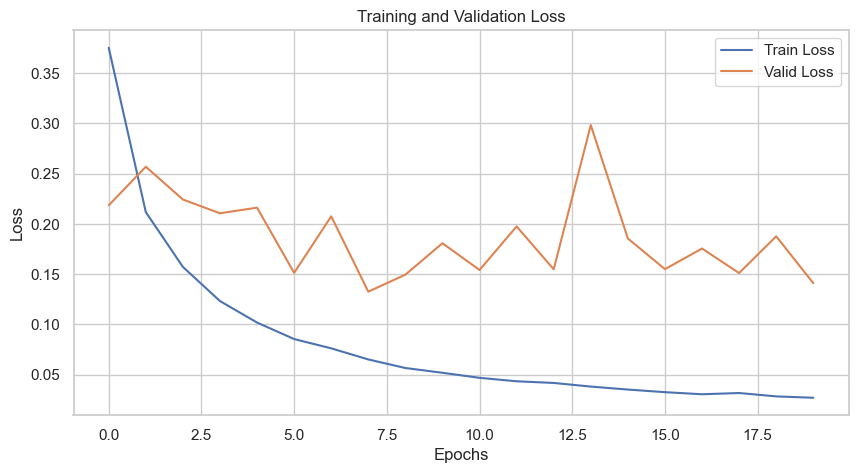

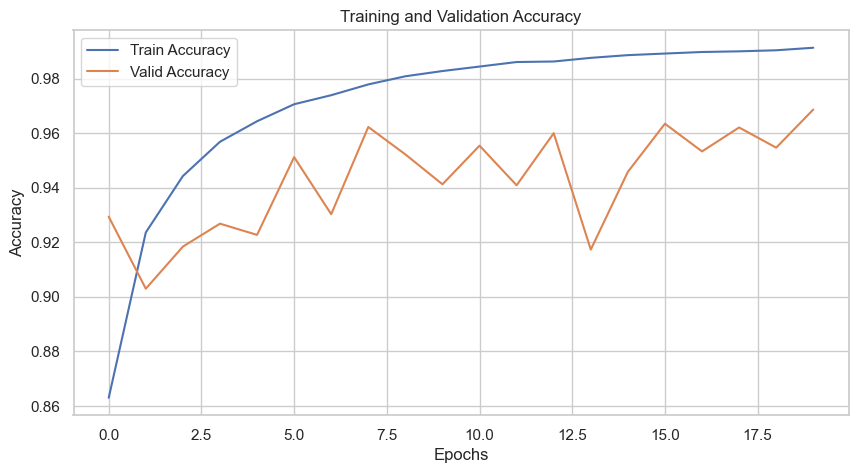

In [27]:
# Plot the training and validation loss
plt.figure(figsize=(10,5))
plt.plot(train_losses, label='Train Loss')
plt.plot(valid_losses, label='Valid Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Plot the training and validation accuracy
plt.figure(figsize=(10,5))
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(valid_accuracies, label='Valid Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      9012
           1       0.63      0.82      0.71       289
           2       0.93      0.95      0.94       754
           3       0.72      0.91      0.80        78
           4       0.97      0.99      0.98       813

    accuracy                           0.97     10946
   macro avg       0.85      0.93      0.88     10946
weighted avg       0.97      0.97      0.97     10946

Accuracy Score: 0.9706742188927462


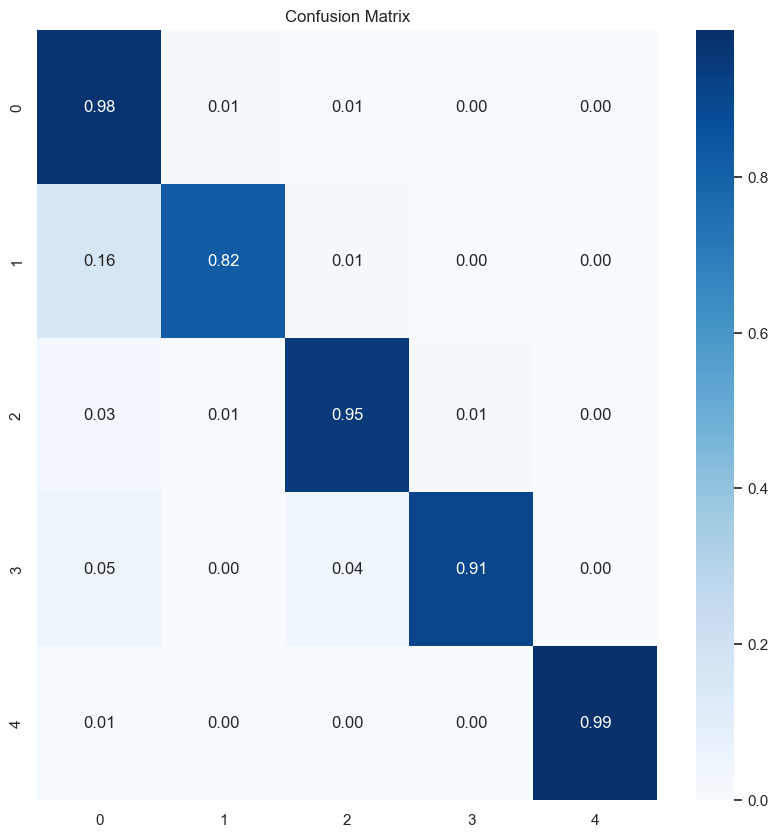

In [29]:
from sklearn.metrics import classification_report, confusion_matrix


# Test the model in the test dataset
model.eval()
test_acc = 0

# Classification report
y_pred = []
y_true = []
for X, y in test_loader:
    X, y = X.to(device), y.to(device)
    output = model(X)
    y_pred.extend(output.argmax(1).tolist())
    y_true.extend(y.tolist())
    test_acc += (output.argmax(1) == y).sum().item()
print(classification_report(y_true, y_pred))
print(f"Accuracy Score: {test_acc/len(test_dataset)}")

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt=".2f", cmap='Blues')
plt.title('Confusion Matrix')
plt.show()